# Newton's Method

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 16

## Problem to solve

Find the solution to 

$$f(x) = x^2 + 2x - 10 = 0$$

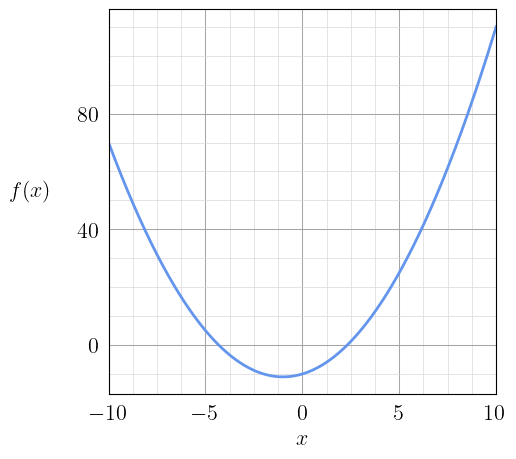

In [3]:
xs = np.linspace(-10, 10, 1000)
ys = xs**2 + 2*xs - 10

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(xs, ys, linewidth=2, color="cornflowerblue")

ax.xaxis.set_major_locator(MultipleLocator(5.0))
ax.xaxis.set_minor_locator(MultipleLocator(1.25))
ax.yaxis.set_major_locator(MultipleLocator(40.0))
ax.yaxis.set_minor_locator(MultipleLocator(10.0))

ax.grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
ax.grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
ax.tick_params(which="both", bottom=False, left=False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$", rotation=0)
ax.yaxis.set_label_coords(-0.2, 0.5)

ax.set_xlim([-10, 10])

plt.show()

## Implementation

The derivative of $f(x)$ is

$$\nabla f(x) = 2x + 2$$

The linear approximation at $\hat{x}$ has the form of

$$\tilde{f}(\hat{x}) = f(\hat{x}) + \nabla f(\hat{x})(x - \hat{x})$$

Then the update is

$$\hat{x} \leftarrow \hat{x} - \frac{f(\hat{x})}{\nabla f(\hat{x})} = \hat{x} - \frac{\hat{x}^2 + 2\hat{x} - 10}{2\hat{x} + 2} = \frac{\hat{x}^2 + 10}{2\hat{x} + 2}$$

In [4]:
x = 10
fx = x**2 + 2*x - 10
_xs = []

sol_info = {
    "x": x,
    "f(x)": fx,
    "∇f(x)": 2 * x + 2,
}

_xs.append(sol_info)

while fx > 1e-3:
    x = (x**2 + 10) / (2*x+2)
    fx = x**2 + 2*x - 10
    print(f"x: {x}, f(x): {fx}")
    
    sol_info = {
        "x": x,
        "f(x)": fx,
        "∇f(x)": 2 * x + 2,
    }
    _xs.append(sol_info)

# One additional iteration for plotting
x = (x**2 + 10) / (2*x+2)
fx = x**2 + 2*x - 10
print(f"x: {x}, f(x): {fx}")
sol_info = {
    "x": x,
    "f(x)": fx,
    "∇f(x)": 2 * x + 2,
}
_xs.append(sol_info)

x: 5.0, f(x): 25.0
x: 2.9166666666666665, f(x): 4.340277777777775
x: 2.3625886524822692, f(x): 0.30700244580252445
x: 2.3169389347304574, f(x): 0.002083896730821877
x: 2.3166248052315686, f(x): 9.867734007684703e-08
x: 2.3166247903554, f(x): 0.0


In [5]:
x = -10
fx = x**2 + 2*x - 10

while fx > 1e-3:
    x = (x**2 + 10) / (2*x+2)
    fx = x**2 + 2*x - 10
    print(f"x: {x}, f(x): {fx}")

x: -6.111111111111111, f(x): 15.123456790123456
x: -4.631642512077295, f(x): 2.1888273355270815
x: -4.330287501465984, f(x): 0.09081484242054216
x: -4.316652816415433, f(x): 0.00018590463642631505


## Visualize Solution

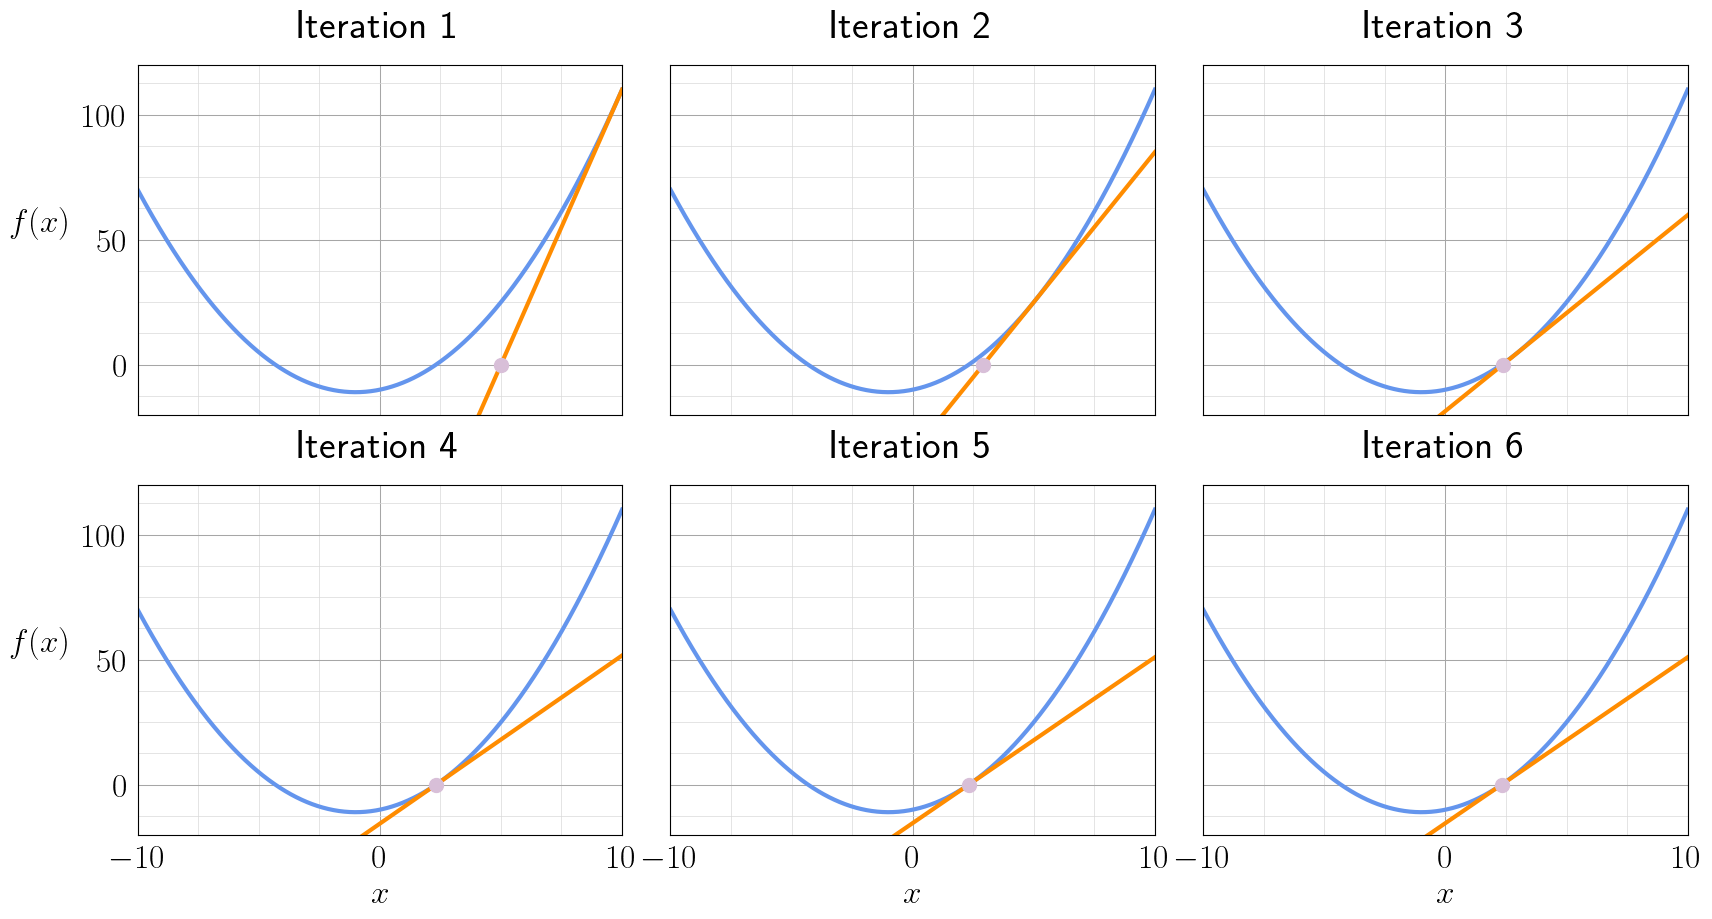

In [6]:
plt.rcParams["font.size"] = 24

fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey=True, sharex=True)

xs = np.linspace(-10, 10, 1000)
ys = xs**2 + 2*xs - 10

for i in range(2):
    for j in range(3):
        axs[i][j].plot(xs, ys, linewidth=3, color="cornflowerblue")

        _ys = _xs[i*3+j]["f(x)"] + _xs[i*3+j]["∇f(x)"] * (xs - _xs[i*3+j]["x"])
        axs[i][j].plot(xs, _ys, linewidth=3, color="darkorange")
        axs[i][j].plot(_xs[i*3+j+1]["x"], 0.0, 'o', color="thistle", markersize=10)

        axs[i][j].xaxis.set_major_locator(MultipleLocator(10.0))
        axs[i][j].xaxis.set_minor_locator(MultipleLocator(2.5))
        axs[i][j].yaxis.set_major_locator(MultipleLocator(50.0))
        axs[i][j].yaxis.set_minor_locator(MultipleLocator(12.5))

        axs[i][j].grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
        axs[i][j].grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
        axs[i][j].tick_params(which="both", bottom=False, left=False)

        axs[1][j].set_xlabel(r"$x$")
        axs[i][j].set_xlim([-10, 10])
        axs[i][j].set_ylim([-20, 120])
        axs[i][j].set_title(f"Iteration {i*3+j+1}", pad=20)

axs[0][0].set_ylabel(r"$f(x)$", rotation=0)
axs[0][0].yaxis.set_label_coords(-0.2, 0.5)
axs[1][0].set_ylabel(r"$f(x)$", rotation=0)
axs[1][0].yaxis.set_label_coords(-0.2, 0.5)

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.savefig("../images/newtons_method_illustration.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()